# Utfordring: Analysere tekst om datavitenskap

I dette eksemplet skal vi gjøre en enkel øvelse som dekker alle trinnene i en tradisjonell datavitenskapsprosess. Du trenger ikke å skrive noen kode, du kan bare klikke på cellene nedenfor for å kjøre dem og observere resultatet. Som en utfordring oppfordres du til å prøve denne koden med forskjellige data.

## Mål

I denne leksjonen har vi diskutert ulike konsepter relatert til datavitenskap. La oss prøve å oppdage flere relaterte konsepter ved å gjøre litt **tekstanalyse**. Vi starter med en tekst om datavitenskap, trekker ut nøkkelord fra den, og prøver deretter å visualisere resultatet.

Som tekst vil jeg bruke siden om datavitenskap fra Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Steg 1: Hente dataene

Første steg i enhver datavitenskapelig prosess er å hente dataene. Vi vil bruke `requests`-biblioteket til dette:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Steg 2: Transformere dataen

Neste steg er å konvertere dataen til en form som er egnet for videre behandling. I vårt tilfelle har vi lastet ned HTML-kildekoden fra siden, og vi må konvertere den til ren tekst.

Det finnes mange måter å gjøre dette på. Vi vil bruke det enkleste innebygde objektet [HTMLParser](https://docs.python.org/3/library/html.parser.html) fra Python. Vi må opprette en underklasse av `HTMLParser`-klassen og definere koden som skal samle all tekst inne i HTML-tagger, unntatt `<script>`- og `<style>`-tagger.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Steg 3: Få innsikt

Det viktigste steget er å omforme dataene våre til en form som vi kan trekke innsikt fra. I vårt tilfelle ønsker vi å trekke ut nøkkelord fra teksten og se hvilke nøkkelord som er mest meningsfulle.

Vi skal bruke et Python-bibliotek som heter [RAKE](https://github.com/aneesha/RAKE) for nøkkelorduttrekk. Først må vi installere dette biblioteket dersom det ikke allerede er installert:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Hovedfunksjonaliteten er tilgjengelig fra `Rake`-objektet, som vi kan tilpasse ved hjelp av noen parametere. I vårt tilfelle vil vi sette minimumslengden på et nøkkelord til 5 tegn, minimumsfrekvensen av et nøkkelord i dokumentet til 3, og maksimalt antall ord i et nøkkelord til 2. Føl deg fri til å eksperimentere med andre verdier og observere resultatet.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Vi fikk en liste over begreper sammen med tilhørende viktighetsgrad. Som du kan se, er de mest relevante fagområdene, som maskinlæring og big data, til stede på listen i topposisjoner.

## Steg 4: Visualisere resultatet

Folk forstår data best i visuell form. Derfor gir det ofte mening å visualisere dataene for å trekke noen innsikter. Vi kan bruke `matplotlib`-biblioteket i Python til å lage et enkelt plott av fordelingen av nøkkelordene med deres relevans:


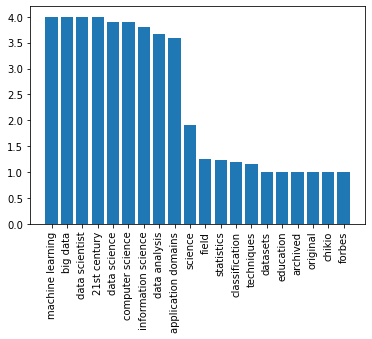

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Det er imidlertid en enda bedre måte å visualisere ordfrekvenser på - ved å bruke **Word Cloud**. Vi må installere et annet bibliotek for å plotte ordskyen fra nøkkelordlisten vår.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-objektet er ansvarlig for å ta inn enten originaltekst eller en forhåndsberegnet liste over ord med deres frekvenser, og returnerer et bilde som deretter kan vises ved hjelp av `matplotlib`:


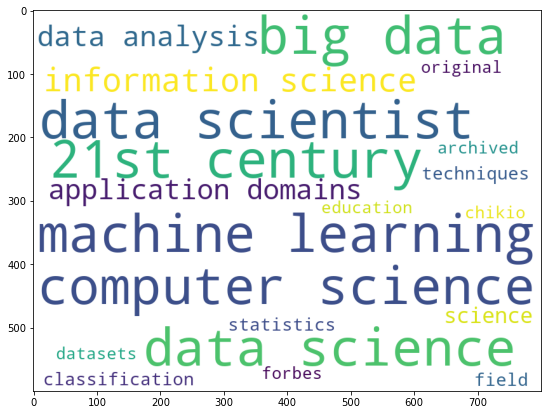

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Vi kan også sende inn den opprinnelige teksten til `WordCloud` - la oss se om vi klarer å få et lignende resultat:


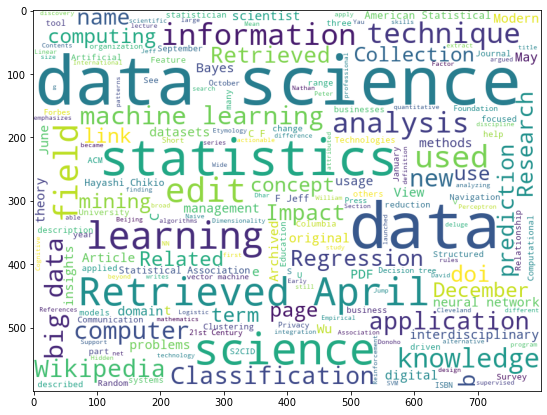

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Du kan se at ordskyen nå ser mer imponerende ut, men den inneholder også mye støy (f.eks. uvedkommende ord som `Retrieved on`). I tillegg får vi færre nøkkelord som består av to ord, som *data scientist* eller *computer science*. Dette skyldes at RAKE-algoritmen gjør en mye bedre jobb med å velge ut gode nøkkelord fra teksten. Dette eksempelet illustrerer viktigheten av dataforbehandling og rengjøring, fordi et klart bilde til slutt vil gjøre det mulig for oss å ta bedre beslutninger.

I denne øvelsen har vi gått gjennom en enkel prosess for å trekke ut noe mening fra Wikipedia-tekst, i form av nøkkelord og ordsky. Dette eksempelet er ganske enkelt, men det viser godt alle de typiske stegene en dataforsker vil ta når de jobber med data, fra datainnhenting til visualisering.

I vårt kurs vil vi diskutere alle disse stegene i detalj.



---

**Ansvarsfraskrivelse**:  
Dette dokumentet er oversatt ved hjelp av AI-oversettelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selv om vi tilstreber nøyaktighet, vennligst vær oppmerksom på at automatiske oversettelser kan inneholde feil eller unøyaktigheter. Det originale dokumentet på sitt opprinnelige språk bør anses som den autoritative kilden. For kritisk informasjon anbefales profesjonell menneskelig oversettelse. Vi er ikke ansvarlige for eventuelle misforståelser eller feiltolkninger som oppstår ved bruk av denne oversettelsen.
